In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = 'Sleep_Survey.csv'
df = pd.read_csv(file_path)

# Dropping two columns
columns_to_drop = ['Timestamp', 'If you are presented with a device which would help to address your current difficulties in sleeping, how much would you be willing to pay?']
df.drop(columns=columns_to_drop, inplace=True)

column_to_clean = 'Have you made any efforts to improve your sleep quality or reduce sleeplessness? (Select all that apply)'

# Apply replacements using lambda function for case-insensitive matching and stripping whitespace
df[column_to_clean] = df[column_to_clean].apply(lambda x: None if str(x).strip().lower() in ['no', 'nothing', 'nope', 'none', '--'] else x)

# Save the modified DataFrame to a new CSV file
modified_file_path = 'new.csv'
df.to_csv(modified_file_path, index=False)

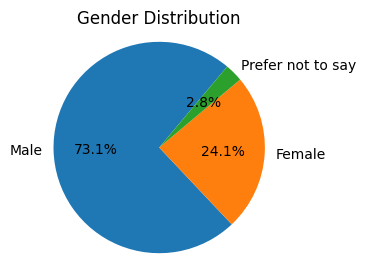

In [3]:
# Load the CSV file into a Pandas DataFrame
file_path = 'new.csv'  
df = pd.read_csv(file_path)

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Gender Distribution')

# Show the pie chart
plt.show()


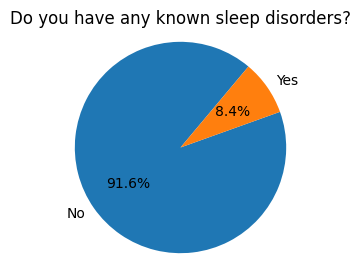

In [4]:
# Load the CSV file into a Pandas DataFrame
file_path = 'new.csv'  
df = pd.read_csv(file_path)

counts = df['Do you have any known sleep disorders?'].value_counts()


plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Do you have any known sleep disorders?')

# Show the pie chart
plt.show()


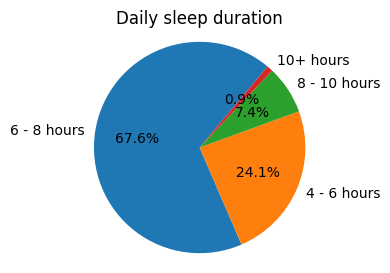

In [5]:
# Load the CSV file into a Pandas DataFrame
file_path = 'new.csv'  
df = pd.read_csv(file_path)


counts = df['Daily sleep duration'].value_counts()


plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Daily sleep duration')

# Show the pie chart
plt.show()


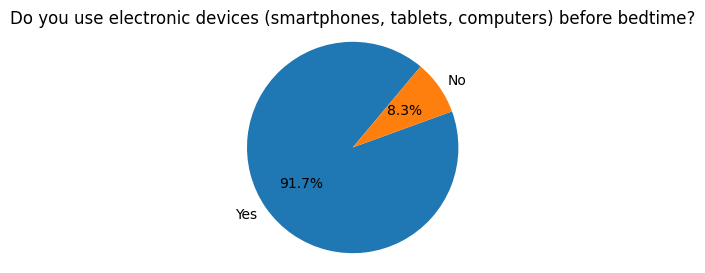

In [6]:
# Load the CSV file into a Pandas DataFrame
file_path = 'new.csv'  
df = pd.read_csv(file_path)


counts = df['Do you use electronic devices (smartphones, tablets, computers) before bedtime?'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Do you use electronic devices (smartphones, tablets, computers) before bedtime?')

# Show the pie chart
plt.show()

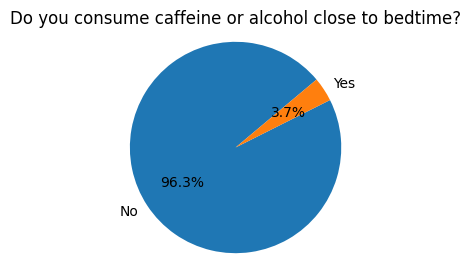

In [7]:
# Load the CSV file into a Pandas DataFrame
file_path = 'new.csv'  
df = pd.read_csv(file_path)

counts = df[' Do you consume caffeine or alcohol close to bedtime? '].value_counts()

# Plotting a pie chart
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=40)
plt.axis('equal') 
plt.title('Do you consume caffeine or alcohol close to bedtime?')

# Show the pie chart
plt.show()

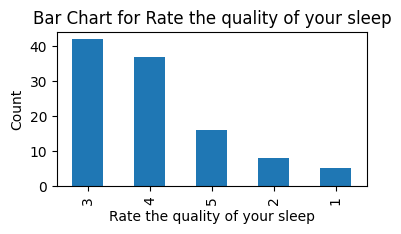

In [8]:
# Load the CSV file into a Pandas DataFrame
file_path = 'new.csv'
df = pd.read_csv(file_path)

column_for_bar_chart = 'Rate the quality of your sleep'
# Get value counts for the column
value_counts = df[column_for_bar_chart].value_counts()

# Plotting a bar chart
plt.figure(figsize=(4, 2))
value_counts.plot(kind='bar')
plt.title('Bar Chart for ' + column_for_bar_chart)
plt.xlabel(column_for_bar_chart)
plt.ylabel('Count')
plt.show()


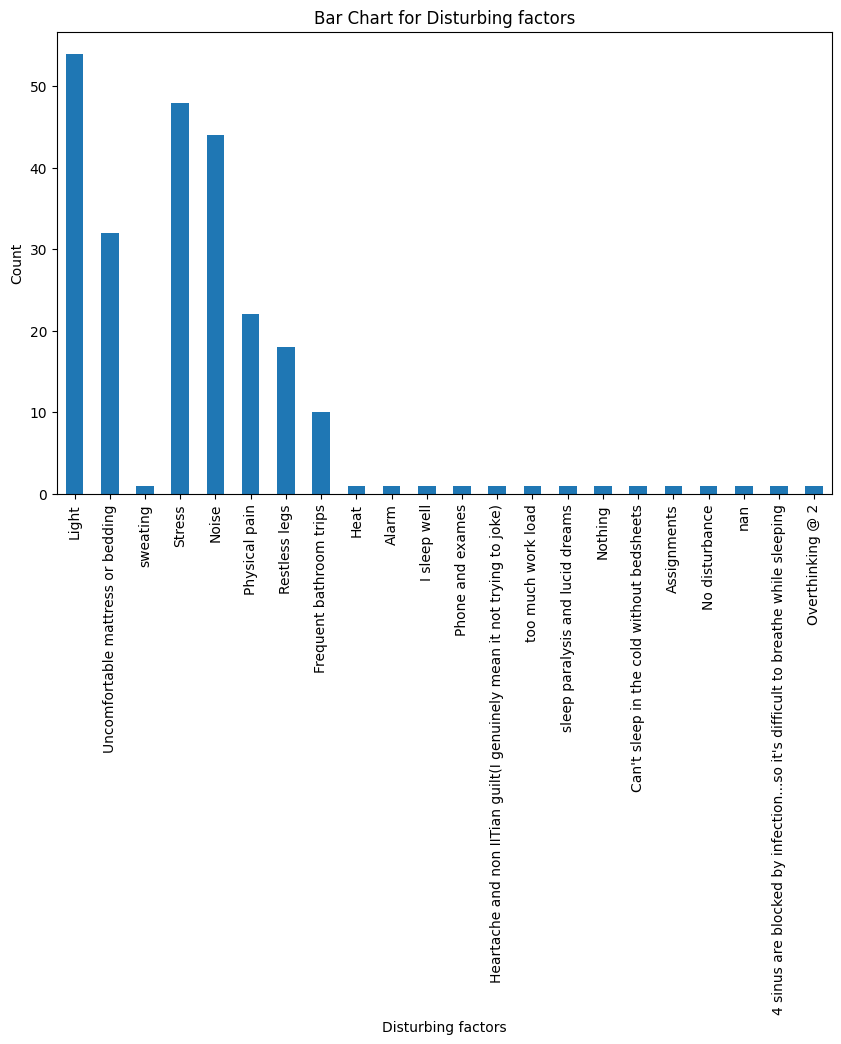

In [26]:
disturbing_factors = pd.DataFrame()
for i in df['Please select any common factors that disturb your sleep']:
    series = pd.Series()
    values = str(i).split(", ")
    cleaned_values = [value.strip() for value in values]
    for value in cleaned_values:
        series[value] = 1
    disturbing_factors = disturbing_factors._append(series, ignore_index=True)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
disturbing_factors.sum().plot(kind='bar')
# plt.xticks(rotation = 75)
plt.title('Bar Chart for ' + "Disturbing factors")
plt.xlabel("Disturbing factors")
plt.ylabel('Count', )
plt.show()

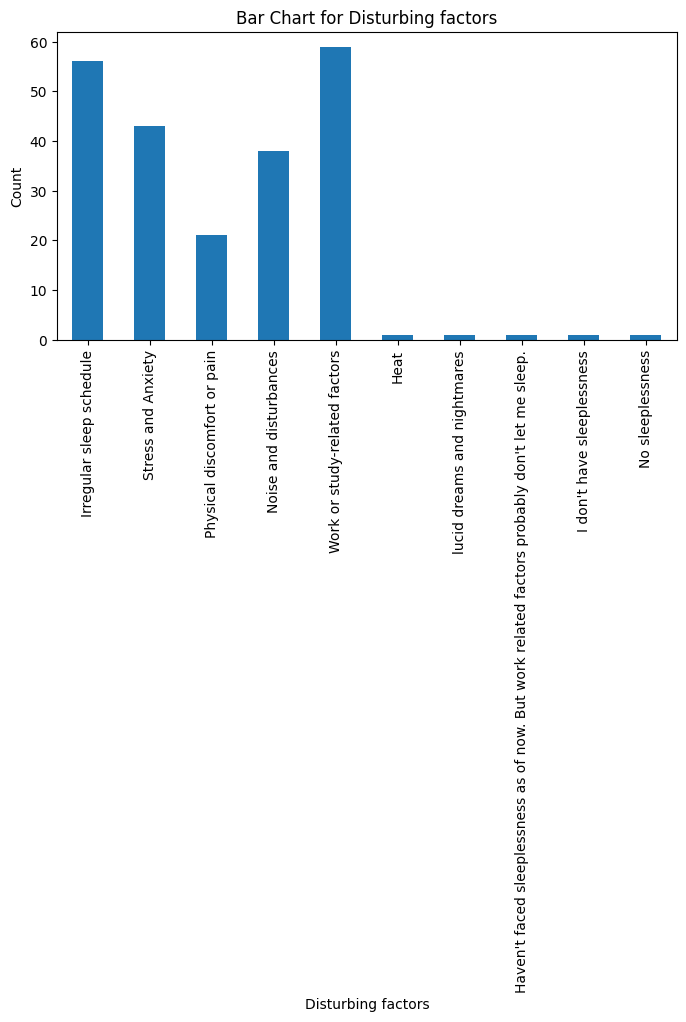

In [29]:
reasons = pd.DataFrame()
for i in df['What do you believe is the primary reason for your sleeplessness? (Select the most relevant option)']:
    series = pd.Series()
    values = str(i).split(", ")
    cleaned_values = [value.strip() for value in values]
    for value in cleaned_values:
        series[value] = 1
    reasons = reasons._append(series, ignore_index=True)

# Plotting a bar chart
plt.figure(figsize=(8, 4))
reasons.sum().plot(kind='bar')
# plt.xticks(rotation = 75)
plt.title('Bar Chart for ' + "Reasons for Sleeplessness")
plt.xlabel("Disturbing factors")
plt.ylabel('Count', )
plt.show()

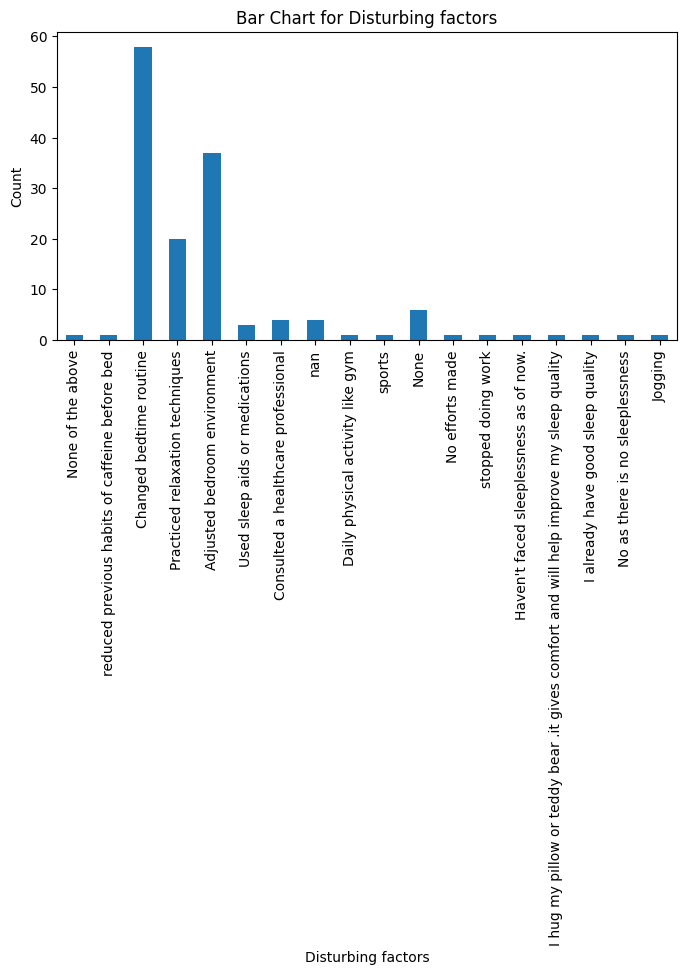

In [30]:
efforts = pd.DataFrame()
for i in df['Have you made any efforts to improve your sleep quality or reduce sleeplessness? (Select all that apply)']:
    series = pd.Series()
    values = str(i).split(", ")
    cleaned_values = [value.strip() for value in values]
    for value in cleaned_values:
        series[value] = 1
    efforts = efforts._append(series, ignore_index=True)

# Plotting a bar chart
plt.figure(figsize=(8, 4))
efforts.sum().plot(kind='bar')
# plt.xticks(rotation = 75)
plt.title('Bar Chart for ' + "Efforts put in to improve sleep")
plt.xlabel("Disturbing factors")
plt.ylabel('Count', )
plt.show()

In [43]:
# we'll translate some of the above features to binary
# Daily sleep duration -> "good sleep duration (6-10)", "bad sleep duration(<6 and >10)"
# Rate the quality of your sleep -> "good quality (3-5)", "bad quality (1-2)"

sleep_dur = pd.Series()
for i in range(len(df['Daily sleep duration'])):
    val = df['Daily sleep duration'][i]
    if not(val == '4 - 6 hours' or val == '10+ hours'):
        sleep_dur[i] = 1
    else:
        sleep_dur[i] = 0

sleep_qual = pd.Series()
for i in range(len(df['Rate the quality of your sleep'])):
    val = df['Rate the quality of your sleep'][i]
    if not(val == 1 or val == 2):
        sleep_qual[i] = 1
    else:
        sleep_qual[i] = 0
sleep_qual.sum()

95